In [1]:
import numpy as np
import random
from collections import Counter

In [2]:
########读取机器学习数据集的示例代码 (LIBSVM格式)
def load_svmfile(filename):
    X = []
    Y = []
    with open(filename, 'r') as f:
        filelines = f.readlines()
        for fileline in filelines:
            fileline = fileline.strip().split(' ')
            #print(fileline)
            Y.append(int(fileline[0]))
            tmp = []
            for t in fileline[1:]:
                if len(t)==0:
                    continue
                tmp.append(float(t.split(':')[1]))
            X.append(tmp)
    return np.array(X), np.array(Y)

In [3]:
########从这个网址下载数据集：https://www.csie.ntu.edu.tw/~cjlin/libsvmtools/datasets/binary.html#svmguide1
########将数据集保存在当前目录下
########读取数据集
dataset = 'svmguide1.txt'
testset='svmguide1_test.txt'
print('Start loading dataset {}'.format(dataset))
X, Y = load_svmfile(dataset) # train set
X_test, Y_test = load_svmfile(testset) # test set
print('trainset X shape {}, train label Y shape {}'.format(X.shape, Y.shape))
print('testset X_test shape {}, test label Y shape {}'.format(X_test.shape, Y_test.shape))

Start loading dataset svmguide1.txt
trainset X shape (3089, 4), train label Y shape (3089,)
testset X_test shape (4000, 4), test label Y shape (4000,)


In [4]:
########实现一个KNN分类器的模型，需要完成的功能包括train, test和_calculate_distances三部分
class KNN_model():
    def __init__(self, k=1):
        self.k = k
    
    def train(self, x_train, y_train):
        """Implement the training code for KNN
        Input: 
            x_train: Training instances of size (N, D), where N denotes the number of instances and D denotes the feature dimension
            y_train: Training labels of size (N, )
        """
        pass
    
    
    def test(self, x_train, y_train, x_test):
        """
        Input: Test instances of size (N, D), where N denotes the number of instances and D denotes the feature dimension
        Return: Predicted labels of size (N, )
        """
        predict=[]
        for i in range(len(x_test)):
            distance=self._calculate_distances(x_test[i],x_train)
            arr_merge=np.vstack((distance,y_train))
            index = np.lexsort((distance,))
            arr_sort_k=arr_merge.T[index].T[:,:self.k][-1:,][0].astype(int)
            predict.append(np.argmax(np.bincount(arr_sort_k)))
        predict=np.array(predict)
        return predict
        pass

    def _calculate_distances(self, point,x_train):
        """Calculate the euclidean distance between a test instance and all points in the training set x_train
        Input: a single point of size (D, )
        Return: distance matrix of size (N, )
        """
        distance=np.array([np.linalg.norm(point-i) for i in x_train])
        #print(distance,len(distance))
        return distance
        pass


In [5]:
######### 将原来的训练集划分成两部分：训练和验证
random.seed(777777) #定下随机种子
N = X.shape[0] 
valid_frac = 0.2 # 设置验证集的比例为20%
valid_size = int(N*valid_frac)

# 出于简单起见，这里直接使用random shuffle来划分
shuffle_index = [i for i in range(N)]
random.shuffle(shuffle_index)
valid_index, train_index = shuffle_index[:valid_size], shuffle_index[valid_size:]
X_valid, Y_valid = X[valid_index], Y[valid_index]
X_train, Y_train = X[train_index], Y[train_index]
print('trainset X_train shape {}, validset X_valid shape {}'.format(X_train.shape, X_valid.shape))

trainset X_train shape (2472, 4), validset X_valid shape (617, 4)


In [6]:
######### 这里需要实现计算准确率的函数，注意我们期望的输出是百分制，如准确率是0.95，我们期望的输出是95
def cal_accuracy(y_pred, y_gt):
    '''
    y_pred: predicted labels (N,)
    y_gt: ground truth labels (N,)
    Return: Accuracy (%)
    '''
    sum=0
    for i in range(len(y_gt)):
        sum+=y_gt[i]==y_pred[i]
    return sum*100/len(y_gt)
    pass
assert abs(cal_accuracy(np.zeros(Y.shape[0]), Y)-100*1089.0/3089.0)<1e-3

k=1, accuracy on validation=96.27228525121556%
k=3, accuracy on validation=96.27228525121556%
k=5, accuracy on validation=96.27228525121556%
k=7, accuracy on validation=96.43435980551054%
k=9, accuracy on validation=96.11021069692059%
k=11, accuracy on validation=95.62398703403565%


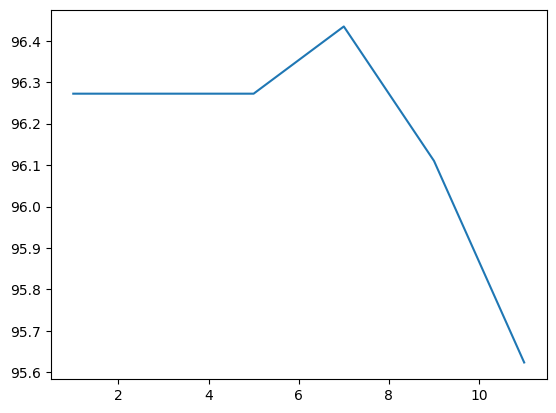

In [7]:
#####使用验证集来选择超参数
possible_k_list = [1,3,5,7,9,11] # 在本次实验中候选的超参数取值
accs = [] # 将每个取值k对应的验证集准确率加入列表
for k in possible_k_list:
    #####模型的超参数设置为k
    model=KNN_model(k=k)
    pass
    #####在训练集上训练, 提示: model.train()
    pass
    #####在验证集X_valid上给出预测结果 Y_pred_valid, 提示：model.test()
    Y_pred_valid=model.test(X_train, Y_train, X_valid)
    pass
    #####计算验证集上的准确率
    acc_k = cal_accuracy(Y_pred_valid, Y_valid)
    #####将每个取值k对应的验证集准确率加入列表
    accs.append(acc_k)
    print('k={}, accuracy on validation={}%'.format(k, acc_k))

import matplotlib.pyplot as plt
plt.plot(possible_k_list, accs) #画出每个k对应的验证集准确率

In [8]:
#####基于上面的结果确定验证集上的最好的超参数k，根据这个k最终在测试集上进行测试
best_k=7
#####定义最好的k对应的模型
pass
model=KNN_model(k=best_k)
#####在训练集上训练，注意这里可以使用全部的训练数据
pass
Y_pred_test=model.test(X, Y, X_test)
#####在测试集上测试生成预测 Y_pred_test
pass
print('Test Accuracy={}%'.format(cal_accuracy(Y_pred_test, Y_test)))

Test Accuracy=96.575%


In [9]:
#####以下需要实现5折交叉验证，可以参考之前训练集和验证集划分的方式
folds = 5

for k in possible_k_list: # 遍历所有可能的k
    print('******k={}******'.format(k))
    valid_accs = []
    for i in range(folds): # 第i折的实验
        ##### 生成第i折的训练集 X_train_i, Y_train_i和验证集 X_valid_i, Y_valid_i; 提示：可参考之前random shuffle的方式来生成index
        valid_index= shuffle_index[valid_size*i:valid_size*(i+1)]
        train_index =shuffle_index[:valid_size*i]+shuffle_index[valid_size*(i+1):]
        X_valid_i, Y_valid_i = X[valid_index], Y[valid_index]
        X_train_i, Y_train_i = X[train_index], Y[train_index]
        pass
        ##### 定义超参数设置为k的模型
        model=KNN_model(k=k)
        pass
        ##### 在Fold-i上进行训练
        pass
        ##### 给出Fold-i验证集X_valid_i上的预测结果 Y_pred_valid_i
        Y_pred_valid_i=model.test(X_train_i, Y_train_i, X_valid_i)
        pass
        acc = cal_accuracy(Y_pred_valid_i, Y_valid_i)
        valid_accs.append(acc)
        print('Valid Accuracy on Fold-{}: {}%'.format(i+1, acc))
    
    print('k={}, Accuracy {}+-{}%'.format(k, np.mean(valid_accs), np.std(valid_accs)))

******k=1******
Valid Accuracy on Fold-1: 96.27228525121556%
Valid Accuracy on Fold-2: 96.59643435980551%
Valid Accuracy on Fold-3: 95.62398703403565%
Valid Accuracy on Fold-4: 94.6515397082658%
Valid Accuracy on Fold-5: 94.81361426256078%
k=1, Accuracy 95.59157212317666+-0.769811480521099%
******k=3******
Valid Accuracy on Fold-1: 96.27228525121556%
Valid Accuracy on Fold-2: 97.73095623987034%
Valid Accuracy on Fold-3: 96.92058346839546%
Valid Accuracy on Fold-4: 95.94813614262561%
Valid Accuracy on Fold-5: 95.94813614262561%
k=3, Accuracy 96.56401944894652+-0.6830245544799147%
******k=5******
Valid Accuracy on Fold-1: 96.27228525121556%
Valid Accuracy on Fold-2: 98.05510534846029%
Valid Accuracy on Fold-3: 97.40680713128039%
Valid Accuracy on Fold-4: 96.11021069692059%
Valid Accuracy on Fold-5: 95.46191247974068%
k=5, Accuracy 96.6612641815235+-0.9372338602788294%
******k=7******
Valid Accuracy on Fold-1: 96.43435980551054%
Valid Accuracy on Fold-2: 98.21717990275526%
Valid Accuracy 

In [10]:
#####基于交叉验证确定验证集上的最好的超参数k，根据这个k最终在测试集上进行测试
best_k=7
#####定义最好的k对应的模型
pass
model=KNN_model(k=best_k)
#####在训练集上训练，注意这里可以使用全部的训练数据
pass
#####在测试集上测试生成预测 Y_pred_test
Y_pred_test=model.test(X, Y, X_test)
pass
print('Test Accuracy chosing k using cross-validation={}%'.format(cal_accuracy(Y_pred_test, Y_test)))

Test Accuracy chosing k using cross-validation=96.575%


In [11]:
#####如果训练/测试集不均衡如果评估模型呢？
#####生成一个不均衡的测试集，由于示例数据集中所有的标签1都在后面所以出于方便直接这样来生成一个不均衡的测试集
N_test = int(X_test.shape[0]*0.7)
X_test, Y_test = X_test[:N_test], Y_test[:N_test]
print(Counter(Y_test)) # 输出新的测试集中的标签分布

model = KNN_model(k=best_k) # 此处请填入交叉验证确定的最好的k
#model.train(X, Y)
Y_pred_test = model.test(X,Y,X_test)



Counter({0: 2000, 1: 800})


In [12]:
#实现计算percision， recall和F1 score的函数
def cal_prec_recall_f1(Y_pred, Y_gt):
    '''
    Input: predicted labels y_pred, ground truth labels Y_gt
    Retur: precision, recall, and F1 score
    '''
    pass
    TP = np.sum((Y_pred == 1) & (Y_gt == 1))
    P = np.sum(Y_gt == 1)
    
    precision = TP / np.sum(Y_pred == 1)
    recall = TP / P
    f1 = 2 * precision * recall / (precision + recall)
    
    return precision, recall, f1
    
print(cal_prec_recall_f1(Y_pred_test, Y_test))

(0.910271546635183, 0.96375, 0.936247723132969)
